# Train the Model

## Understand the Dataset

In [242]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [243]:
df = pd.read_csv("financial_regression.csv")

In [244]:
df.shape

(3904, 47)

In [245]:
df.head()

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.520,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.550,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0
2,2010-01-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2010-01-19,113.62,115.13,113.59,115.06,138671890.0,1.54,45.96,46.640,45.95,...,47.08,45.70,46.94,629150.0,1.38,110.95,111.75,110.83,111.52,10467927.0
4,2010-01-20,114.28,114.45,112.98,113.89,216330645.0,1.47,46.27,46.604,45.43,...,47.31,45.17,47.05,643198.0,2.14,109.97,110.05,108.46,108.94,17534231.0


In [246]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 47 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                3904 non-null   object 
 1   sp500 open          3719 non-null   float64
 2   sp500 high          3719 non-null   float64
 3   sp500 low           3719 non-null   float64
 4   sp500 close         3719 non-null   float64
 5   sp500 volume        3719 non-null   float64
 6   sp500 high-low      3719 non-null   float64
 7   nasdaq open         3719 non-null   float64
 8   nasdaq high         3719 non-null   float64
 9   nasdaq low          3719 non-null   float64
 10  nasdaq close        3719 non-null   float64
 11  nasdaq volume       3719 non-null   float64
 12  nasdaq high-low     3719 non-null   float64
 13  us_rates_%          176 non-null    float64
 14  CPI                 176 non-null    float64
 15  usd_chf             3694 non-null   float64
 16  eur_us

In [247]:
df.describe()

,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,nasdaq close,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
count,3719.000000,3719.000000,3719.000000,3719.000000,3.719000e+03,3719.000000,3719.000000,3719.000000,3719.00000,3719.000000,...,3719.000000,3719.000000,3719.000000,3.719000e+03,3719.000000,3719.000000,3719.000000,3719.000000,3719.000000,3.719000e+03
mean,268.732724,270.179765,267.157446,268.779352,1.124206e+08,3.022320,181.394495,182.689784,179.98249,181.431795,...,110.184473,107.931862,109.067990,7.169556e+04,2.252611,145.454975,146.101477,144.761329,145.453861,9.658138e+06
std,121.374890,122.024860,120.663204,121.393684,6.902901e+07,2.656917,122.468973,123.393400,121.43517,122.473492,...,58.454170,56.877967,57.688191,9.790703e+04,2.543622,29.604259,29.754711,29.422517,29.611348,6.182342e+06
min,103.110000,103.420000,101.130000,102.200000,1.708170e+05,0.300000,42.670000,42.821500,41.55000,42.470000,...,40.550000,38.490000,40.090000,3.157000e+03,0.230000,100.920000,100.990000,100.232600,100.500000,1.436508e+06
25%,169.715000,170.175000,169.030000,169.650000,6.699112e+07,1.280000,78.700000,79.150000,78.31500,78.730000,...,69.400000,68.270000,68.820000,2.085900e+04,0.870000,120.555000,121.030000,120.170000,120.590000,5.795310e+06
50%,241.180000,242.080000,239.450000,240.610000,9.239907e+07,2.090000,138.720000,139.420000,138.02000,139.050000,...,83.900000,82.650000,83.210000,3.829500e+04,1.414000,137.620000,138.140000,136.990000,137.710000,8.087993e+06
75%,374.455000,377.800000,371.045000,374.255000,1.367146e+08,3.815000,284.165000,287.590000,281.23000,284.835000,...,143.785000,140.480000,142.040000,8.420700e+04,2.680000,167.770000,168.412500,167.055000,167.835000,1.156729e+07
max,585.910000,586.120000,582.580000,584.590000,7.095045e+08,22.960000,503.070000,503.520000,498.39000,502.960000,...,298.210000,277.000100,295.000000,1.199042e+06,45.392300,253.080000,253.940000,252.520000,253.930000,9.369811e+07


In [248]:
df.isnull().sum() # Check how many nulls in each col

date                     0
sp500 open             185
sp500 high             185
sp500 low              185
sp500 close            185
sp500 volume           185
sp500 high-low         185
nasdaq open            185
nasdaq high            185
nasdaq low             185
nasdaq close           185
nasdaq volume          185
nasdaq high-low        185
us_rates_%            3728
CPI                   3728
usd_chf                210
eur_usd                210
GDP                   3847
silver open            185
silver high            185
silver low             185
silver close           185
silver volume          185
silver high-low        185
oil open               185
oil high               185
oil low                185
oil close              185
oil volume             185
oil high-low           185
platinum open          185
platinum high          185
platinum low           185
platinum close         185
platinum volume        185
platinum high-low      185
palladium open         185
p

In [249]:
# drop columns that has less than 90% non null values
threshold = 0.9 * len(df)
df = df.dropna(thresh=threshold, axis=1)

In [250]:
df.head(2)

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.52,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.55,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0


In [251]:
# df.fillna(df.median(numeric_only=True), inplace=True)
df.dropna(inplace=True) # Just drop all nulls

In [252]:
df.isnull().sum()

date                  0
sp500 open            0
sp500 high            0
sp500 low             0
sp500 close           0
sp500 volume          0
sp500 high-low        0
nasdaq open           0
nasdaq high           0
nasdaq low            0
nasdaq close          0
nasdaq volume         0
nasdaq high-low       0
usd_chf               0
eur_usd               0
silver open           0
silver high           0
silver low            0
silver close          0
silver volume         0
silver high-low       0
oil open              0
oil high              0
oil low               0
oil close             0
oil volume            0
oil high-low          0
platinum open         0
platinum high         0
platinum low          0
platinum close        0
platinum volume       0
platinum high-low     0
palladium open        0
palladium high        0
palladium low         0
palladium close       0
palladium volume      0
palladium high-low    0
gold open             0
gold high             0
gold low        

## Data Visualization

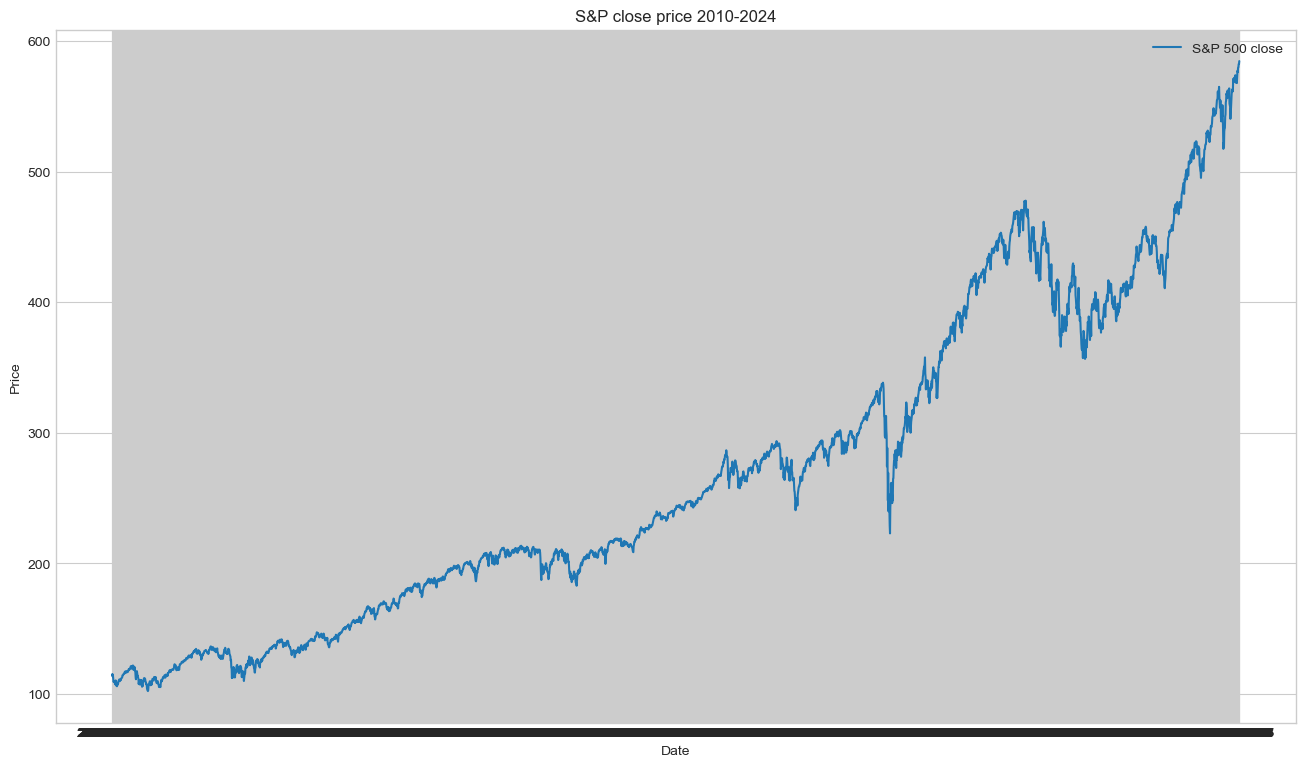

In [253]:
# SP500 stock price over time
plt.figure(figsize=(16, 9))
plt.plot(df['date'], df['sp500 close'], label='S&P 500 close')
plt.title('S&P close price 2010-2024')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Data Wrangling

In [254]:
# change date column to datatime format
df['date'] = pd.to_datetime(df['date'])

In [255]:
df.head(2)

,date,sp500 open,sp500 high,sp500 low,sp500 close,sp500 volume,sp500 high-low,nasdaq open,nasdaq high,nasdaq low,...,palladium high,palladium low,palladium close,palladium volume,palladium high-low,gold open,gold high,gold low,gold close,gold volume
0,2010-01-14,114.49,115.14,114.42,114.93,115646960.0,0.72,46.26,46.52,46.22,...,45.02,43.86,44.84,364528.0,1.16,111.51,112.37,110.79,112.03,18305238.0
1,2010-01-15,114.73,114.84,113.20,113.64,212252769.0,1.64,46.46,46.55,45.65,...,45.76,44.40,45.76,442210.0,1.36,111.35,112.01,110.38,110.86,18000724.0


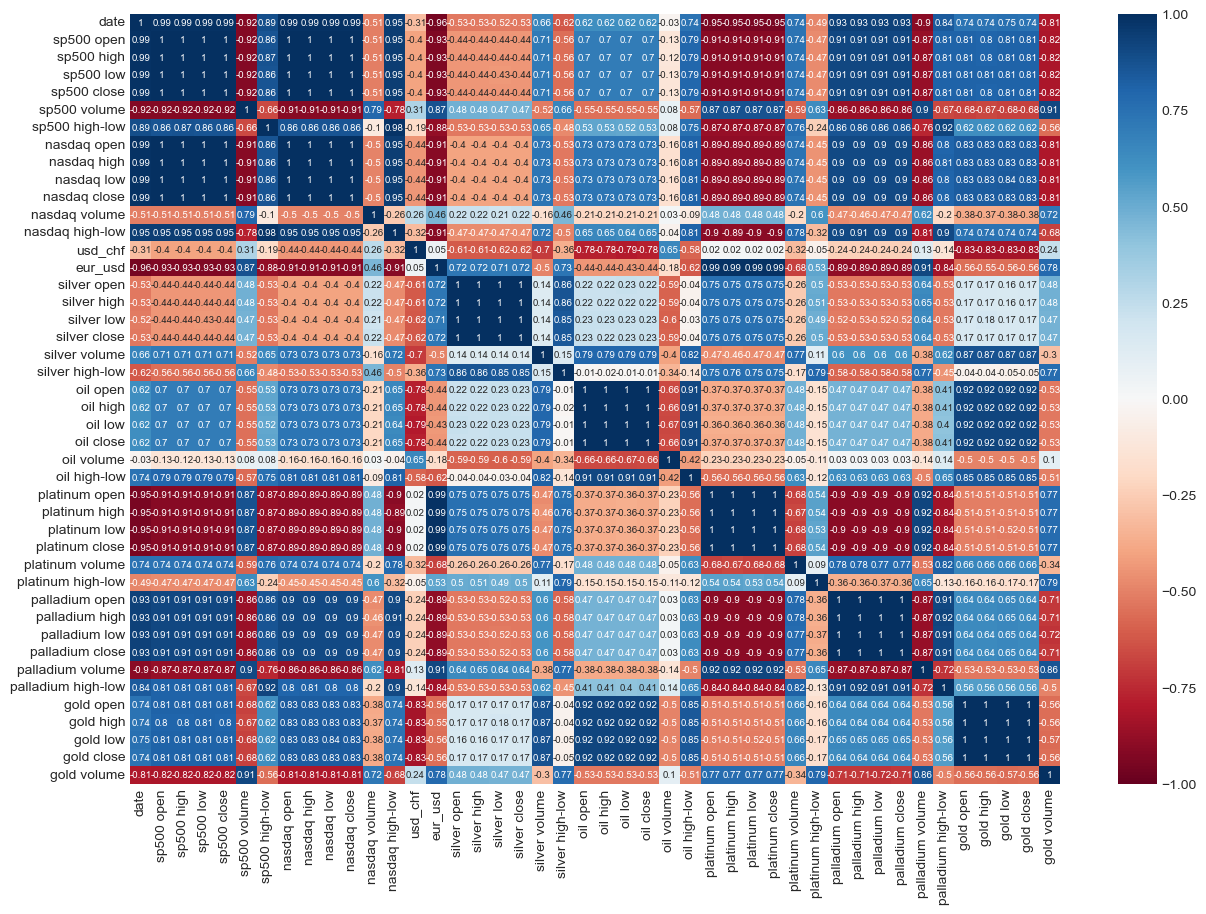

In [256]:
# Correlations between the prices and economic indicators
corr_matrix = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(round(corr_matrix.corr(),2), cmap='RdBu', annot=True, 
            annot_kws={"size": 7}, vmin=-1, vmax=1);

## (Optional) Drop Irrelevant Data

In [257]:
# Define the target variable
# target_variable = 'sp500 close' # We are going to predict sp500

# # Calculate the correlation matrix
# corr_matrix = df.select_dtypes(include=np.number).corr()
# corr_with_target = corr_matrix[target_variable]

# # The features with a correlation (in absolute value) less than 0.3 will be dropped.
# correlation_threshold = 0.2

# # Identify the columns to drop.
# cols_to_drop = corr_with_target[corr_with_target.abs() < correlation_threshold].index.tolist()

# if cols_to_drop:
#     print(f"Found {len(cols_to_drop)} features with low correlation to drop:")
#     print(cols_to_drop)
# else:
#     print("No features to drop.")


In [258]:
# # Drop the identified columns from your DataFrame
# df_filtered = df.drop(columns=cols_to_drop)

# print(f"Original number of features: {len(df.columns) - 2}")
# print(f"Number of features after dropping: {len(df_filtered.columns) - 2}")

## Preparing Data for Training

In [259]:
# drop sp500 close colum for test
target = 'sp500 close'
X = df.drop(columns=['date', target])
y = df[target]

In [260]:
# split test and train dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standarize data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Selected models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1, max_iter=5000),
}

## Train and Validation

In [261]:
# Start training
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        "R2 Score": r2_score(y_test, y_pred),
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred)
    }
# Show analyzed results
for model_name, metrics in results.items():
    print(f"\n{model_name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


Linear Regression
R2 Score: 1.0000
RMSE: 0.5725
MAE: 0.3551

Ridge Regression
R2 Score: 0.9999
RMSE: 1.1634
MAE: 0.7468

Lasso Regression
R2 Score: 0.9998
RMSE: 1.5709
MAE: 0.9941


In [262]:
# Select the model with smallest MAE as best model
best_model_name = min(results, key=lambda x: results[x]['MAE'])
print(f"Best Model: {best_model_name}")

Best Model: Linear Regression


In [263]:
# İlgili model nesnesini yeniden oluştur
model_dict = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1, max_iter=5000),
}

best_model = model_dict[best_model_name]
best_model.fit(X_train_scaled, y_train)

LinearRegression()

In [264]:
# Save model for later use
model_path = "best_model.pkl"
joblib.dump(best_model, model_path)

print(f"Model Location: {model_path}")

Model Location: best_model.pkl


In [265]:
# Save scaler
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

# Use The Model for Prediction

In [11]:
import joblib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os

In [12]:
MODEL_PATH = "best_model.pkl"
DATA_PATH = "financial_regression.csv"
SCALER_PATH = "scaler.pkl"

In [13]:
try:
    model = joblib.load(MODEL_PATH)
    scaler = joblib.load(SCALER_PATH)
    print("Model and scaler loaded successfully.")
except Exception as e:
    print(f"An error occurred while loading the model or scaler: {e}")
    exit()

Model and scaler loaded successfully.


## Data Cleaning

In [14]:
df = pd.read_csv(DATA_PATH)
df['date'] = pd.to_datetime(df['date'])

threshold = 0.9 * len(df)
df = df.dropna(thresh=threshold, axis=1)

df.dropna(inplace=True) # Just drop all nulls

# Take all columns except for 'date' and the target variable 'sp500 close'.
features = [col for col in df.columns if col not in ['date', 'sp500 close']]
print(f"Using {len(features)} features for scaler and model.")

# Get the last known row of data to use for simulation
X_last = df[features].iloc[-1:].values

Using 42 features for scaler and model.


## Random Walk

In [15]:
def generate_future_features(last_known_features, num_days):
    """ Generates feature data using last known data"""
    
    future_features_list = []
    current_features = last_known_features.copy()
    
    for _ in range(num_days):
        next_day_features = []
        for i, feature_name in enumerate(features):
            current_value = current_features[0, i]
            
            # Apply a small random change for price and rate-like columns
            if any(kw in feature_name for kw in ['close', 'open', 'high', 'low', 'chf', 'eur']):
                change = np.random.normal(loc=0.0001, scale=0.015) # Simulate small daily change
                new_value = current_value * (1 + change)
            # Use a different noise model for variables like volume
            elif 'volume' in feature_name:
                change = np.random.normal(loc=0, scale=0.05) # Larger fluctuation for volume
                new_value = current_value * (1 + change)
            else:
                change = np.random.normal(loc=0, scale=0.005)
                new_value = current_value + change

            next_day_features.append(max(0, new_value)) # Prevent negative values
        
        future_features_list.append(next_day_features)
        current_features = np.array([next_day_features])
        
    return np.array(future_features_list)

## Perdiction

In [16]:
# Date range for the next year
last_date = df['date'].iloc[-1]
future_dates = pd.bdate_range(start=last_date + pd.Timedelta(days=1), periods=252)

# Generate the future feature data
future_features_simulated = generate_future_features(X_last, len(future_dates))
# Change np type back to DataFrame
future_features_df = pd.DataFrame(future_features_simulated, columns=features)

# Scale the generated future data
future_features_scaled = scaler.transform(future_features_df)

# Make the predictions
future_predictions = model.predict(future_features_scaled)

In [17]:
predictions_df = pd.DataFrame({
    'date': future_dates,
    'predicted_sp500_close': future_predictions
})

print("\n--- First 5 Predictions for the Next Year ---")
print(predictions_df.head())


--- First 5 Predictions for the Next Year ---
        date  predicted_sp500_close
0 2024-10-21             593.232742
1 2024-10-22             586.992938
2 2024-10-23             585.876048
3 2024-10-24             583.095359
4 2024-10-25             571.051381


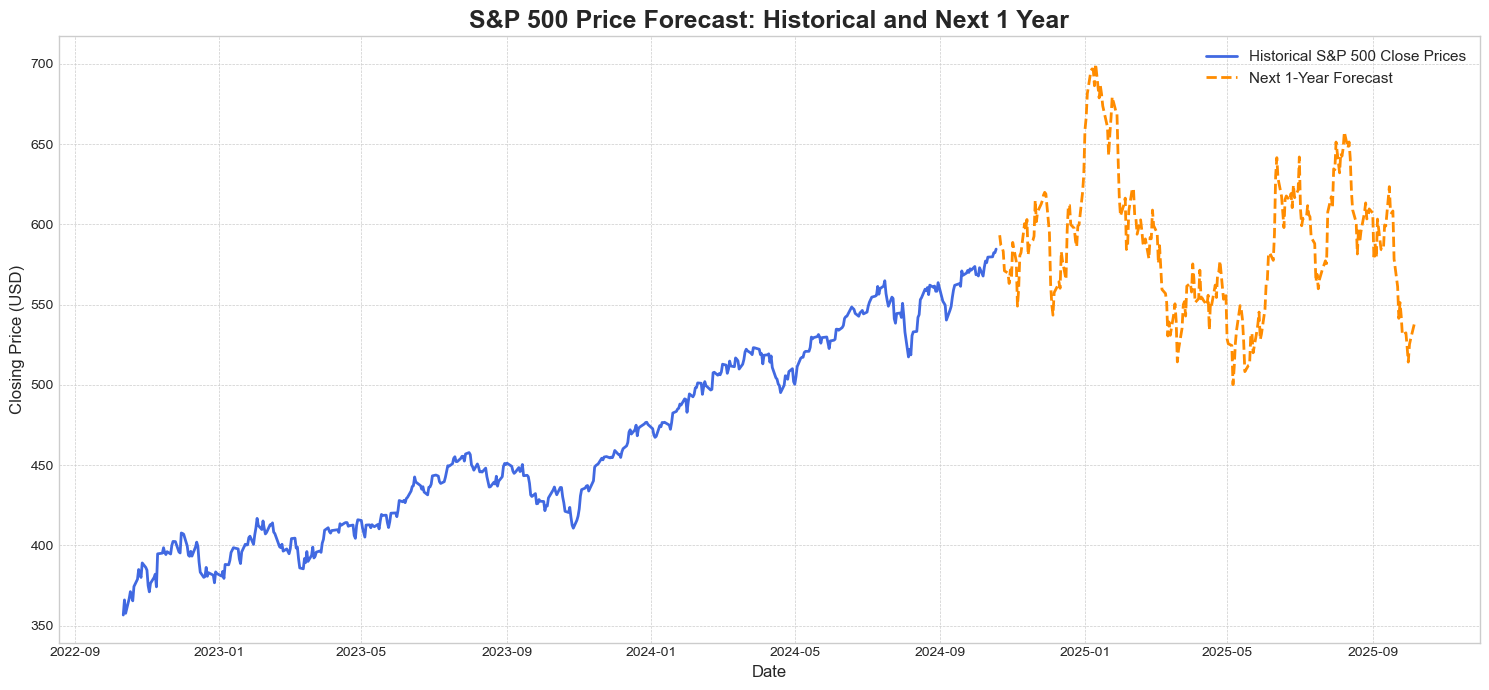

In [18]:
# Visulization
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(15, 7))

# Plot historical data (last 2 years)
historical_plot_df = df.tail(504)
plt.plot(historical_plot_df['date'], historical_plot_df['sp500 close'], label='Historical S&P 500 Close Prices', color='royalblue', linewidth=2)

# Plot predicted data
plt.plot(predictions_df['date'], predictions_df['predicted_sp500_close'], label='Next 1-Year Forecast', color='darkorange', linestyle='--', linewidth=2)

# Configure the plot
plt.title('S&P 500 Price Forecast: Historical and Next 1 Year', fontsize=18, fontweight='bold')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price (USD)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [10]:
output_filename = "sp500_1year_forecast.csv"

# Save the predictions DataFrame to a CSV file
predictions_df.to_csv(output_filename, index=False)

print(f"\nPredictions have been successfully saved to '{output_filename}'.")


Predictions have been successfully saved to 'sp500_1year_forecast.csv'.
